-0## Data Storytelling

1. Ask the following questions and look for the answers using code and plots:
    1. Can you count something interesting?
    2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    3. Can you make a bar plot or a histogram?
    4. Can you compare two related quantities?
    5. Can you make a scatterplot?
    6. Can you make a time-series plot?
    
2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?


In [2]:
#run DataClean.py to grab training dataset
%run -i DataClean.py

#The ID column is person and the idhogar column is per household. 
#create new dataframe consisting of only head of households (this also will give unique households)
hohDF = trainDF.loc[trainDF['parentesco1'] == 1]
#double check to see that all values of idhogar are unique
print(any(hohDF['idhogar'].duplicated()))
print(hohDF.shape)


False
(2970, 137)


    To familiarize myself with the data I first ran some basic counts.  I ran overall Target value counts to see how many of the households fell into with Target. Out of the 2,970 households in the training data only 222 fell into Target 1 of extreme poverty.  442 households fell into target 2 of moderate poverty and 355 households fell into Target 3 of vulnerable households. Most households fell into Target level 4, nonvulnerable households, with a count of 1,951. 

    I also wanted to take a look at the age distribution for the head of households provided in the data and found that the majority age group was from around 30 - 60.  

    To get an idea of where the households were located and to see if there were more vulnerable houses located in urban or rural areas but the counts look pretty evenly distributed.  I normalized the data since the amount of households were just generally larger in urban areas and we can see that there are more households for target values 1,2 and 3 that are located in rural areas while more households that fall in target value 4 are located in urban areas. 

    One of the main questions I had while looking through the data was if having a undergraduate level degree or higher affected which Target level the household would fall into.  I found that although the number of those with a degree was signigicantly less than those without, the majority of those with a degree fell into the two higher Target values. 

Target Value Overall Totals for Head of Households 
 1    0.074747
2    0.148822
3    0.119529
4    0.656902
Name: Target, dtype: float64 



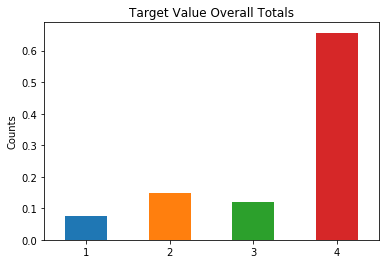

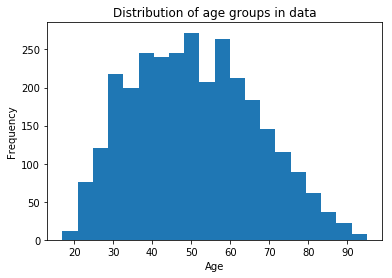

Target values for homes in urban areas
 1    0.067294
2    0.137882
3    0.108235
4    0.686588
Name: Target, dtype: float64 

Target values for homes in rural areas
 1    0.093491
2    0.176331
3    0.147929
4    0.582249
Name: Target, dtype: float64 



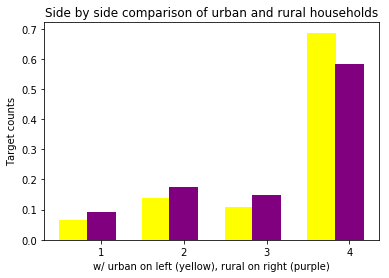

undergraduate or higher level of education (non normalized)
 instlevel8  Target
0           1          215
            2          431
            3          338
            4         1491
1           1            7
            2           11
            3           17
            4          460
Name: instlevel8, dtype: int64
undergraduate or higher level of education (normalized)
 instlevel8  Target
0           1         0.140162
            2         0.285714
            3         0.223046
            4         1.000000
1           1         0.000000
            2         0.002695
            3         0.006739
            4         0.305256
Name: instlevel8, dtype: float64


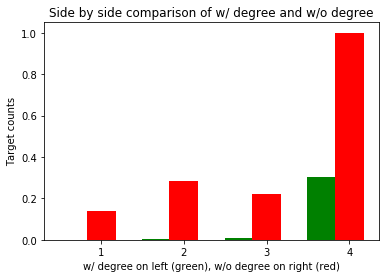

In [29]:
# Target values 
# 1 = extreme poverty
# 2 = moderate poverty
# 3 = vulnerable households
# 4 = nonvulnerable households

#function to get target values for binary columns (1 = yes, 0 = no)
def TargetCountsOne(colname):
	TCounts = hohDF[hohDF[colname] == 1]['Target'].value_counts(normalize = True).sort_index()
	return TCounts

#funcion to get target values when col1 and col2 are both true (1 = yes, 0 = no)
def TargetCountsTwo(col1, col2):
	TCounts = hohDF[(hohDF[col1] == 1) & (hohDF[col2] == 1)]['Target'].value_counts(normalize = True)
	return TCounts

#head of household counts for how many households fall into each category. parentesco1 = person is head of household                                                           
hohTarget = TargetCountsOne('parentesco1')
print("Target Value Overall Totals for Head of Households \n", hohTarget, '\n')

#Bar plot to show Target value Totals
hohTarget.plot(y = hohTarget, kind='bar', rot=0)
plt.title('Target Value Overall Totals')
plt.ylabel('Counts')
plt.show()

#Looked at the distribution for age in the data using a histogram
plt.title('Distribution of age groups in data')
plt.hist(hohDF['age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# if home is located in urban area area1 = urban
urban = TargetCountsOne('area1')
print("Target values for homes in urban areas\n", urban, "\n")
#if home is located in rural area area2 = rural
rural = TargetCountsOne('area2')
print("Target values for homes in rural areas\n", rural, "\n")

indices = [1,2,3,4]
#degree = count_hasDegree_norm[1]
#noDegree = count_hasDegree_norm[0]
#width = np.min(np.diff(indices))/3

fig, ax = plt.subplots()
barUrban = plt.bar(indices - width, urban, color = 'yellow', width = 0.35)
barRural = plt.bar(indices, rural, color = 'purple', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('Side by side comparison of urban and rural households')
plt.xlabel('w/ urban on left (yellow), rural on right (purple)')
plt.ylabel('Target counts')
plt.show()


#counts for having an undergraduate degree or higher corresponds to poverty Target (instlevel8: 1 = has degree, 0 = does not have degree)
hasDegree = hohDF.groupby(['instlevel8','Target'])
count_hasDegree = hasDegree['instlevel8'].count()
count_hasDegree_norm = ((count_hasDegree - count_hasDegree.min()) / (count_hasDegree.max() - count_hasDegree.min()))
print("undergraduate or higher level of education (non normalized)\n", count_hasDegree)
print("undergraduate or higher level of education (normalized)\n", count_hasDegree_norm)

#Side by side bar plot to compare target values for head of households with and without undergrad or higher degree
indices = [1,2,3,4]
degree = count_hasDegree_norm[1]
noDegree = count_hasDegree_norm[0]
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots()
bar0 = plt.bar(indices - width, degree, color = 'green', width = 0.35)
bar1 = plt.bar(indices, noDegree, color = 'red', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('Side by side comparison of w/ degree and w/o degree')
plt.xlabel('w/ degree on left (green), w/o degree on right (red)')
plt.ylabel('Target counts')

plt.show()


    I wanted to further look into how education effects economic household target value and also wanted to add the children attribute.  I used the following two columns:

hogar_nin = number of children in the household (0-9)
escolar = years of schooling (0-21)

    I created a scatter plot to see what the overall trend of the data for education and children and as years of schooling for head of households goes up the amount of children in the household goes down.  Looking at the graph 7 years of schooling and 3 children in the household looked like good reference points to use for creating the bar graphs for target value counts.

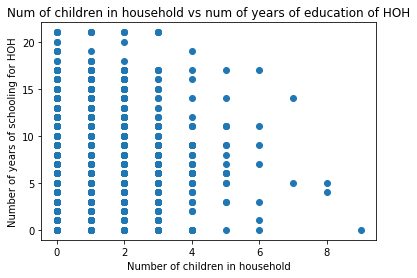

In [19]:
#Counts for head of household level of education

#save column values into variables
numOfChildren = hohDF['hogar_nin']
numOfEdYears  = hohDF['escolari']

#scatter plot for number of children in household and years of schooling for the head of houshold
plt.title('Num of children in household vs num of years of education of HOH')
plt.scatter(numOfChildren, numOfEdYears)
plt.xlabel('Number of children in household')
plt.ylabel('Number of years of schooling for HOH')
plt.show()

    Below I ran the counts for no children in the household and less than 7 years of schooling and also for no children in household and greater than 7 years of schooling.  The bar graph shows that the amount of households in target values 1,2 and 3 are higher for those with less than 7 years of schooling but less for target value 4.  

Target counts for household with no children and years of school < 7
 1    0.067400
2    0.170564
3    0.149931
4    0.612105
Name: Target, dtype: float64 

Target counts for household with no children and years of school > 7
 1    0.026144
2    0.039216
3    0.034314
4    0.900327
Name: Target, dtype: float64


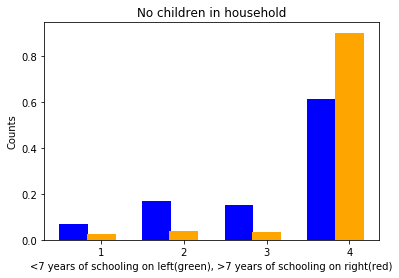

In [21]:

#count for no children in household and less than 7 years of schooling 
ChildrenSchool = hohDF[(hohDF['hogar_nin'] < 1) & (hohDF['escolari'] < 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with no children and years of school < 7\n", ChildrenSchool, '\n')

#count for no children in household and more than 7 years of schooling
ChildrenSchool4 = hohDF[(hohDF['hogar_nin'] < 1) & (hohDF['escolari'] > 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with no children and years of school > 7\n", ChildrenSchool4)

fig, ax = plt.subplots()
bar2 = plt.bar(indices - width, ChildrenSchool, color = 'blue', width = 0.35)
bar3 = plt.bar(indices, ChildrenSchool4, color = 'orange', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('No children in household')
plt.xlabel('<7 years of schooling on left(green), >7 years of schooling on right(red)')
plt.ylabel('Counts')
plt.show()


    Below I ran the counts for at least one child in the household and less than 7 years of schooling and also for at least one child in household and greater than 7 years of schooling.  The results are similar to the bar graph for no children in the household but it does look like the amounts in target values 1,2 and 3 are growing in numbers.  Target value 4 looks unchanged. 

Target counts for household with at least one child and years of school < 7
 1    0.129380
2    0.257412
3    0.187332
4    0.425876
Name: Target, dtype: float64 

Target counts for household with at least one child and years of school > 7
 1    0.061039
2    0.109091
3    0.090909
4    0.738961
Name: Target, dtype: float64 



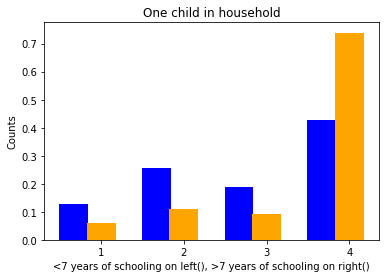

In [22]:
#count for one child in household and less than 7 years of schooling
ChildrenSchool1 = hohDF[(hohDF['hogar_nin'] >= 1) & (hohDF['escolari'] < 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least one child and years of school < 7\n", ChildrenSchool1, '\n')

#count for one child in household and more than 7 years of schooling
ChildrenSchool5 = hohDF[(hohDF['hogar_nin'] >= 1) & (hohDF['escolari'] > 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least one child and years of school > 7\n", ChildrenSchool5, '\n')

fig, ax = plt.subplots()
bar4 = plt.bar(indices - width, ChildrenSchool1, color = 'blue', width = 0.35)
bar5 = plt.bar(indices, ChildrenSchool5, color = 'orange', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('One child in household')
plt.xlabel('<7 years of schooling on left(), >7 years of schooling on right()')
plt.ylabel('Counts')
plt.show()

    Below I ran the counts for at least two children in the household and less than 7 years of schooling and also for at least one child in household and greater than 7 years of schooling.  The results again are similar to the graphs with no children and at least one child.  The blue bars for less than 7 years of schooling are growing but so are the orange bars for head of households with greater than 7 years of schooling. Both the blue and orange bar for target value 4 looks be gradually decreasing in counts. 

Target counts for household with at least 2 children and years of school < 7
 1    0.1400
2    0.3025
3    0.2050
4    0.3525
Name: Target, dtype: float64 

Target counts for household with at least 2 children and years of school > 7
 1    0.085271
2    0.157623
3    0.105943
4    0.651163
Name: Target, dtype: float64 



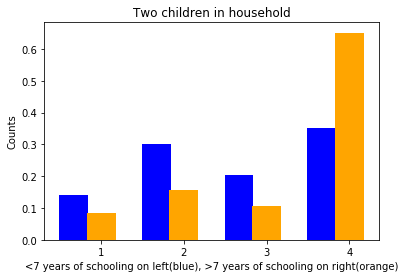

In [23]:
#count for two children in household and less than 7 years of schooling
ChildrenSchool2 = hohDF[(hohDF['hogar_nin'] >= 2)& (hohDF['escolari'] < 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least 2 children and years of school < 7\n", ChildrenSchool2, '\n')

#count for two children in household and more than 7 years of schooling
ChildrenSchool6 = hohDF[(hohDF['hogar_nin'] >= 2)& (hohDF['escolari'] > 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least 2 children and years of school > 7\n", ChildrenSchool6, '\n')

fig, ax = plt.subplots()
bar6 = plt.bar(indices - width, ChildrenSchool2, color = 'blue', width = 0.35)
bar7 = plt.bar(indices, ChildrenSchool6, color = 'orange', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('Two children in household')
plt.xlabel('<7 years of schooling on left(blue), >7 years of schooling on right(orange)')
plt.ylabel('Counts')
plt.show()


    The last bar graph I created was for at least three children in the household for head of households with more than 7 years of schooling and then for those with less than 7 years of schooling.  This graph follows the trend but we can see the blue bars jump a bit from the previous graph which is most visible in the blue bar for target value 2.  We can see a jump from about 0.3 to 0.4.  The orange bar also jumps from about 0.15 to around 0.25.  Both orange and blue bars for target value 4 continue to decrease. 

Target counts for household with at least 3 children and years of school < 7
 1    0.1400
2    0.3025
3    0.2050
4    0.3525
Name: Target, dtype: float64 

Target counts for household with at least 3 children and years of school > 7
 1    0.085271
2    0.157623
3    0.105943
4    0.651163
Name: Target, dtype: float64 



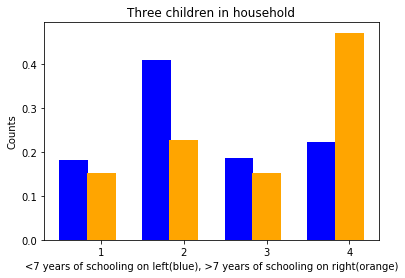

In [24]:
#count for three children in household and less than 7 years of schooling
ChildrenSchool3 = hohDF[(hohDF['hogar_nin'] >= 3)& (hohDF['escolari'] < 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least 3 children and years of school < 7\n", ChildrenSchool2, '\n')

#count for three children in household and more than 7 years of schooling
ChildrenSchool7 = hohDF[(hohDF['hogar_nin'] >= 3)& (hohDF['escolari'] > 7)]['Target'].value_counts(normalize = True).sort_index()
print("Target counts for household with at least 3 children and years of school > 7\n", ChildrenSchool6, '\n')

fig, ax = plt.subplots()
bar8 = plt.bar(indices - width, ChildrenSchool3, color = 'blue', width = 0.35)
bar9 = plt.bar(indices, ChildrenSchool7, color = 'orange', width = 0.35)
ax.set_xticks(range(1,5))
plt.title('Three children in household')
plt.xlabel('<7 years of schooling on left(blue), >7 years of schooling on right(orange)')
plt.ylabel('Counts')
plt.show()

    From the plots created above I can see a correlation between level of education and target values.  The bar graph that shows the side by side comparison shows that a head of household with an undergraduate level degree and higher will most likely put the household in a higher target category.  The majority of those households tend to fall into category 4 which is the target value for non vulnerable households.  Another pretty significant factor was the amount oh children in a household.  Looking at the bar graphs with the side by side comparisons of head of households with less than 7 years of schooling and then greater than 7 years of schooling we can see that as the amount of children goes up so do the target value counts for target values 1, 2 and 3.  Target value 4 counts tends to decrease as amount of children in a household goes up.
    
    The data also provided some information on the physical attributes of a household such as conditions of floors, conditions of ceilings, materials of outside walls, indoor plumbing, etc.  I did run counts but was unable to see any significant patterns in the data.  This is an area I would like to further look into to see if the correlation will become more clear as statistical methods are applied.  Some questions that I want to ask are "Do head of households with more years of shooling tend to live in households that are in better shape?" and "Which household attributes are the most significat to economic target value?"